### Лабораторная работа № 6
### Шамсутдинов Рустам БВТ2201

### Задание 1

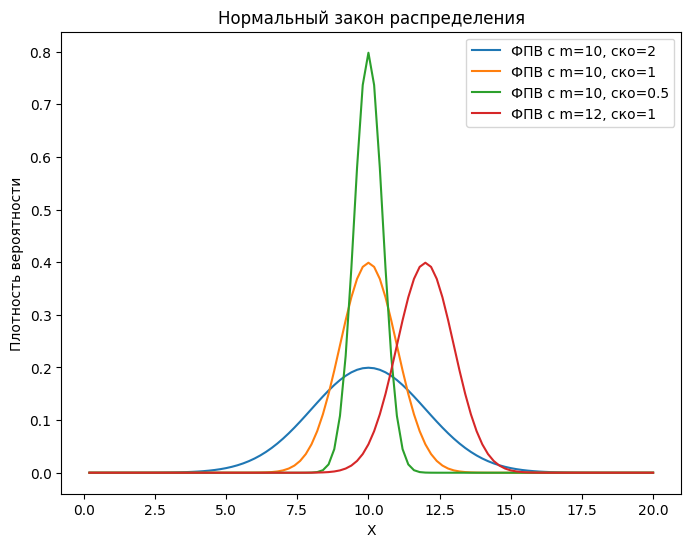

In [1]:
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np


exp_values = [10, 10, 10, 12]
std_values = [2, 1, 0.5, 1]


def normal_pdf(x, expectation, std):

    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - expectation) / std)**2)


def cdf_function(x, expectation=10, std=2):
    cdf_value, _ = quad(normal_pdf, -np.inf, x, args=(expectation, std))
    return cdf_value


def draw_pdf(left_boundary, right_boundary):

    plt.figure(figsize=(8, 6))

    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(1, 101)]

    for std, expectation in zip(std_values, exp_values):
        y_values = [normal_pdf(x, expectation, std) for x in x_values]
        plt.plot(x_values, y_values, label=f"ФПВ с m={expectation}, ско={std}")

    plt.title("Нормальный закон распределения")
    plt.xlabel("X")
    plt.ylabel("Плотность вероятности")
    plt.legend()

    plt.show()


left_boundary = 0 
right_boundary = 20  
draw_pdf(left_boundary, right_boundary)



### Задание 2

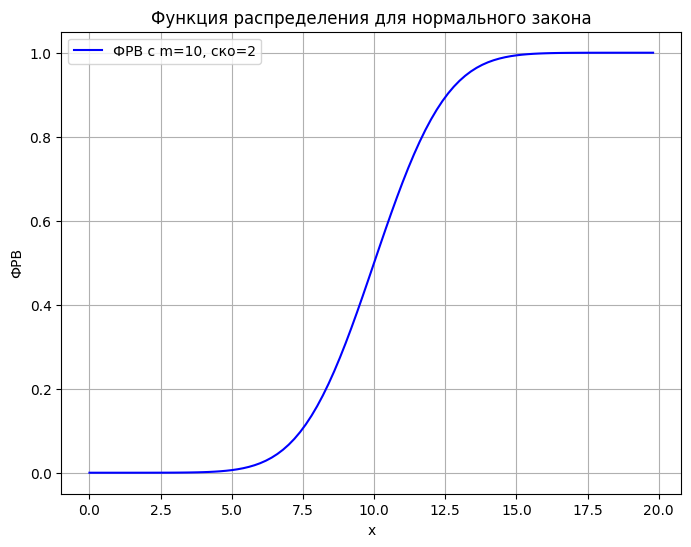

In [2]:
def draw_cdf(left_boundary, right_boundary):

    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]

    cdf_values = [cdf_function(x) for x in x_values]


    plt.figure(figsize=(8, 6))
    plt.plot(x_values, cdf_values, color='blue', label=f"ФРВ с m={exp_values[0]}, ско={std_values[0]}")
    plt.title("Функция распределения для нормального закона")
    plt.xlabel("x")
    plt.ylabel("ФРВ")
    plt.legend()
    plt.grid(True)
    plt.show()



draw_cdf(left_boundary, right_boundary)



### Задание 3

#### части 1 и 2

In [3]:
def GetArg(F, minArg, maxArg, Value, eps):
    minVal= F(minArg)
    maxVal= F(maxArg)

    while abs((maxArg - minArg)/maxArg) > eps:
        midArg = (minArg + maxArg)/2
        midVal = F(midArg)

        if midVal > Value:
            maxArg = midArg
            maxVal = midVal
        else:
            minArg = midArg
            minVal = midVal
            
    return (minArg + maxArg)/2



def GetTabF(F, minArg, maxArg, PointsCount):

    minVal = F(minArg)
    maxVal = F(maxArg)

    dVal = (maxVal - minVal) / (PointsCount - 2)

    YTab = [minVal]
    XTab = [minArg]
    
    for i in range(1, PointsCount - 1):
        YTab_i = minVal + dVal * i 
        XTab_i = GetArg(F, minArg, maxArg, YTab_i, 10**-15) 

        YTab.append(YTab_i)
        XTab.append(XTab_i)
    
    YTab.append(maxVal) 
    XTab.append(maxArg) 

    print(f"YTab={YTab}")
    print(f"XTab={XTab}")

    
    return XTab, YTab


#### часть 3

YTab=[2.8665164083039876e-07, 0.01010129096170939, 0.02020229527177795, 0.03030329958184651, 0.04040430389191507, 0.05050530820198363, 0.060606312512052195, 0.07070731682212074, 0.0808083211321893, 0.09090932544225787, 0.10101032975232642, 0.11111133406239498, 0.12121233837246355, 0.1313133426825321, 0.14141434699260066, 0.15151535130266924, 0.1616163556127378, 0.17171735992280635, 0.18181836423287492, 0.19191936854294347, 0.20202037285301203, 0.2121213771630806, 0.22222238147314916, 0.2323233857832177, 0.24242439009328628, 0.2525253944033548, 0.26262639871342336, 0.2727274030234919, 0.28282840733356046, 0.29292941164362907, 0.3030304159536976, 0.31313142026376617, 0.3232324245738347, 0.33333342888390327, 0.3434344331939718, 0.3535354375040404, 0.363636441814109, 0.37373744612417753, 0.3838384504342461, 0.39393945474431463, 0.4040404590543832, 0.41414146336445173, 0.42424246767452034, 0.4343434719845889, 0.44444447629465744, 0.454545480604726, 0.46464648491479454, 0.4747474892248631, 0

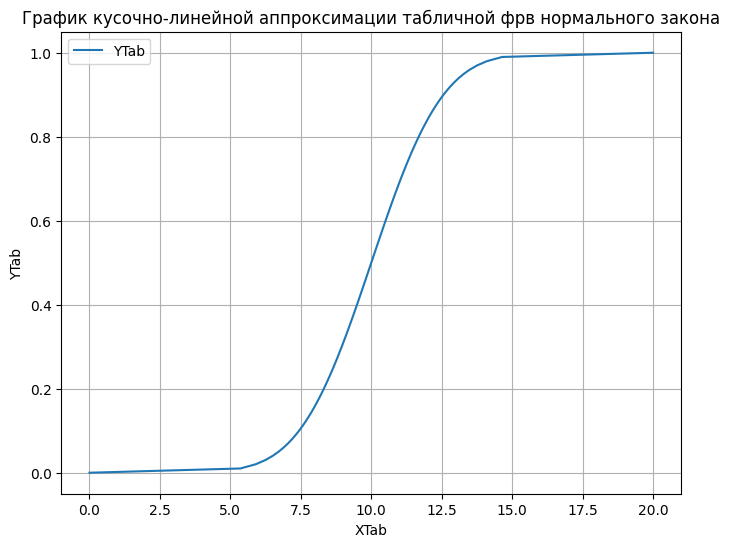

In [4]:
expectation= 10
std=2


minArg = expectation - 10
maxArg = expectation + 10
TabSize = 101

XTab, YTab = GetTabF(cdf_function, minArg, maxArg, TabSize)

def plot_xtab_ytab(XTab, YTab):
   
    plt.figure(figsize=(8, 6))
    plt.plot(XTab, YTab, label="YTab")
    
    plt.title("График кусочно-линейной аппроксимации табличной фрв нормального закона")
    plt.xlabel("XTab")
    plt.ylabel("YTab")
    plt.legend()
    plt.grid(True)

    plt.show()

plot_xtab_ytab(XTab, YTab)



#### часть 4

In [5]:

def Model_N(XTab, YTab, p):
    for i in range(1, len(XTab)):
        if YTab[i-1] <= p <= YTab[i]:

            y = (
                XTab[i-1] * (p - YTab[i]) / (YTab[i-1] - YTab[i]) +
                XTab[i] * (p - YTab[i-1]) / (YTab[i] - YTab[i-1])
            )
            return y




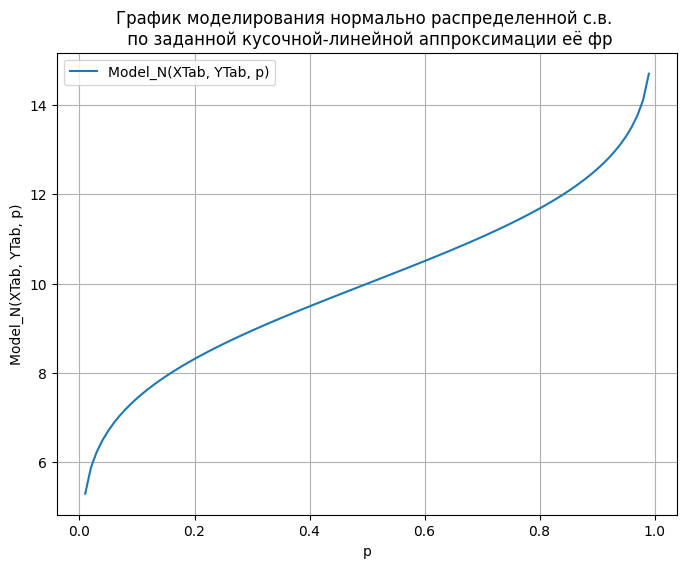

In [6]:
def plot_model_N(XTab, YTab):
    left_boundary = 0
    right_boundary = 1
    p_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(101)]

    model_N_values = [Model_N(XTab, YTab, p) for p in p_values]


    plt.figure(figsize=(8, 6))
    plt.plot(p_values, model_N_values, label="Model_N(XTab, YTab, p)")

    plt.title("График моделирования нормально распределенной с.в. \n по заданной кусочной-линейной аппроксимации её фр")
    plt.xlabel("p")
    plt.ylabel("Model_N(XTab, YTab, p)")


    plt.legend()
    plt.grid(True)
    plt.show()


plot_model_N(XTab, YTab)

#### часть 5

In [7]:
import random

random.seed(42)


n_values = [10**3, 10**4, 10**5, 10**6]


ParArr_results = {}

for n in n_values:
    p_values = [random.uniform(0, 1) for _ in range(n)] 

    ParArr_results[n] = [Model_N(XTab, YTab, p) for p in p_values]



    print(f"Результат для n = {n}:")

    print(f"Макс: {max(ParArr_results[n])}")
    print(f"Мин: {min(ParArr_results[n])}")
    print()


Результат для n = 1000:
Макс: 19.95128884991675
Мин: 0.21504990982376282

Результат для n = 10000:
Макс: 19.94690150096102
Мин: 0.018780012167988875

Результат для n = 100000:
Макс: 19.99900892165724
Мин: 0.0032419739961978694

Результат для n = 1000000:
Макс: 19.99958456359622
Мин: 0.00011264193151201097



### Задание 4

#### часть 1

In [8]:
def GetFreqDistr(RParamsArr, A, B, IntervalsCount):
    dY = (B-A)/IntervalsCount

    Freq = [0] * IntervalsCount

    for j in range(len(RParamsArr)):
        Yc= RParamsArr[j]

        if Yc < A or Yc > B:
            continue
        
        fN = math.floor((Yc - A) / dY)

        if 0 <= fN < IntervalsCount:
            Freq[fN] += 1
        

    for i in range(IntervalsCount):
        Freq[i] = Freq[i]/(len(RParamsArr)*dY)

    return Freq





#### часть 2

In [9]:
A = 0
B = 20
K = 100

resX_values=[]

for k in range(K):
    resX= ((B-A)/K)*(0.5 + k)
    resX_values.append(resX)

resY_e3= GetFreqDistr(ParArr_results[10**3], A, B, K)
resY_e4= GetFreqDistr(ParArr_results[10**4], A, B, K)
resY_e5= GetFreqDistr(ParArr_results[10**5], A, B, K)
resY_e6= GetFreqDistr(ParArr_results[10**6], A, B, K)

resY_list= [resY_e3, resY_e4, resY_e5, resY_e6]

print(resY_e4)
print(ParArr_results[10**4])

[0.003, 0.0025, 0.0015, 0.0015, 0.0015, 0.001, 0.001, 0.0015, 0.0015, 0.0015, 0.0005, 0.0005, 0.002, 0.0035, 0.0015, 0.002, 0.0025, 0.0015, 0.0, 0.003, 0.003, 0.0025, 0.0035, 0.0015, 0.0025, 0.0025, 0.0065, 0.0125, 0.0135, 0.023, 0.0255, 0.036, 0.043, 0.049, 0.059, 0.0745, 0.0885, 0.1, 0.11, 0.125, 0.129, 0.136, 0.1215, 0.1535, 0.183, 0.1935, 0.195, 0.1915, 0.188, 0.201, 0.193, 0.1935, 0.195, 0.1875, 0.1835, 0.188, 0.1675, 0.148, 0.1465, 0.1285, 0.114, 0.1, 0.083, 0.0705, 0.066, 0.0555, 0.049, 0.037, 0.044, 0.0315, 0.023, 0.0155, 0.0165, 0.0075, 0.0045, 0.0025, 0.001, 0.001, 0.001, 0.001, 0.0035, 0.0015, 0.001, 0.0025, 0.0035, 0.002, 0.001, 0.0035, 0.0025, 0.0005, 0.002, 0.003, 0.0015, 0.0015, 0.0025, 0.0015, 0.001, 0.0005, 0.0025, 0.0005]
[7.42890834561906, 10.967325175319056, 10.223388351737919, 14.032114068920933, 9.275922197010974, 9.483626565036746, 8.242590214257753, 7.671247827114643, 12.056146805781564, 9.772495731178578, 10.840138395671985, 10.726103042653062, 10.4919511139904

Гистограмма и ФПВ для resY_e3


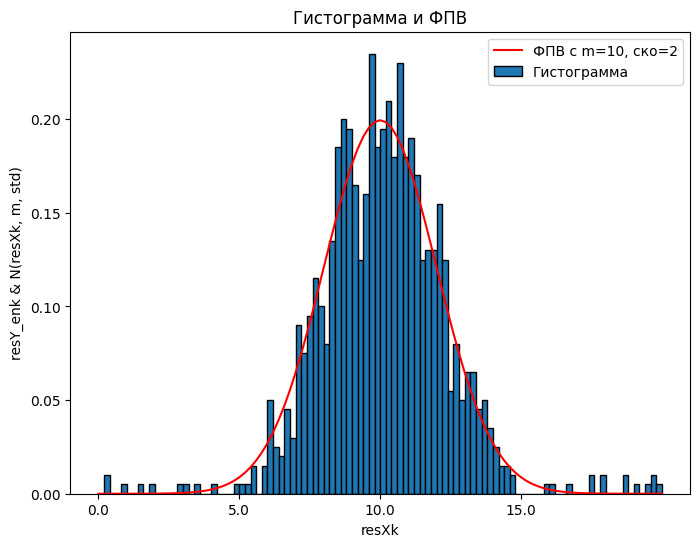

Гистограмма и ФПВ для resY_e4


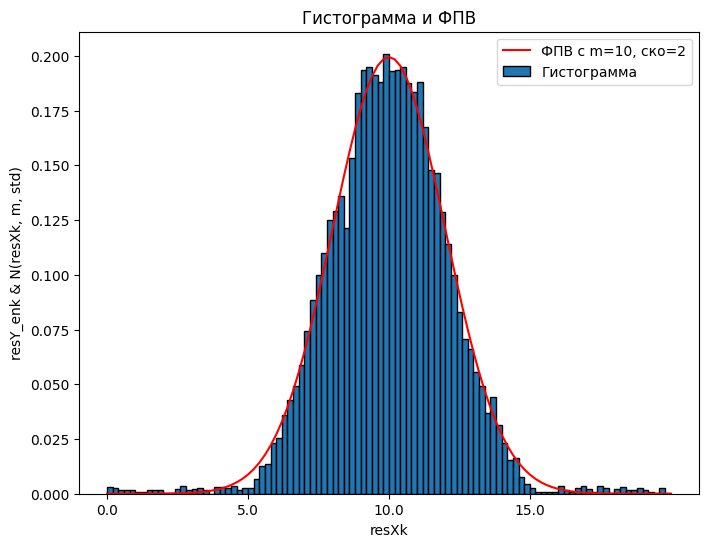

Гистограмма и ФПВ для resY_e5


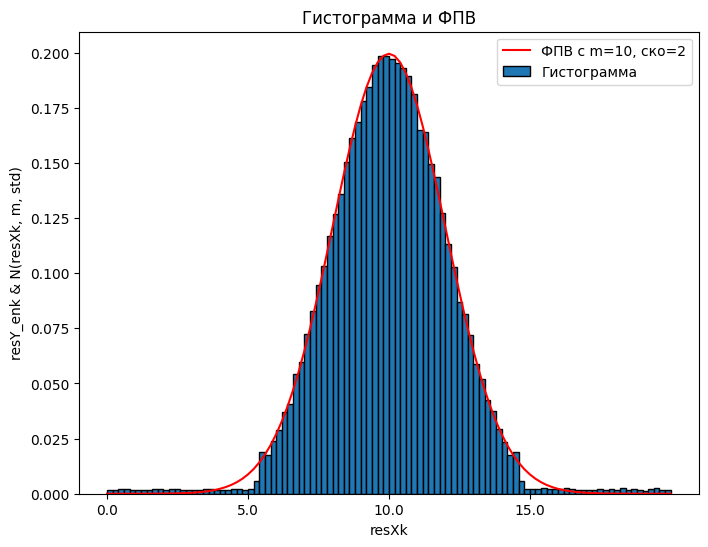

Гистограмма и ФПВ для resY_e6


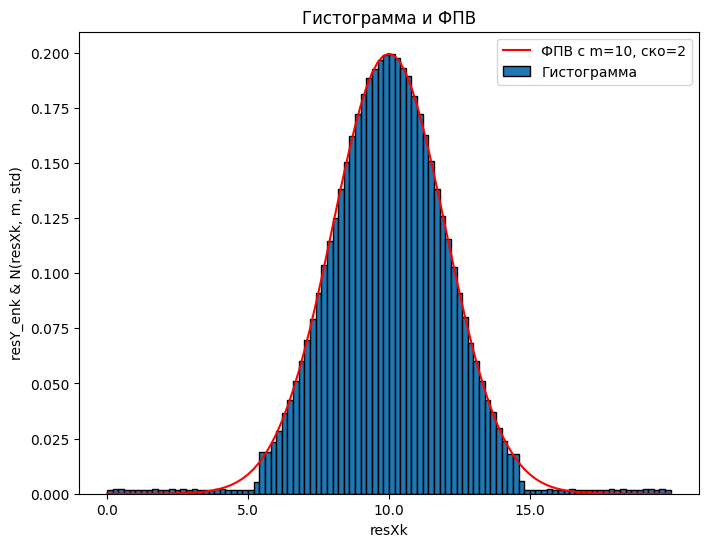

In [10]:
def draw_pdf_and_hist(left_boundary, right_boundary, num_plots, relative_frequencies, std=2, expectation=10):

    plt.figure(figsize=(8, 6))

    bar_width = (right_boundary - left_boundary) / num_plots

    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(101)] 
    y_values = [normal_pdf(x, expectation, std) for x in x_values]
    plt.plot(x_values, y_values, label=f"ФПВ с m={expectation}, ско={std}", color='red')

    bins = [left_boundary + (i * (right_boundary - left_boundary) / num_plots) for i in range(num_plots + 1)]
    
    x_positions = [bins[i] for i in range(num_plots)]

    plt.bar(x_positions, relative_frequencies, width=bar_width, align='edge', edgecolor='black', 
            tick_label=[f'{bins[i]:.1f}' for i in range(len(bins)-1)], label="Гистограмма")
    
    xticks = range(0, right_boundary, 5)
    plt.xticks(xticks)
        
    plt.title("Гистограмма и ФПВ")
    plt.xlabel("resXk")
    plt.ylabel("resY_enk & N(resXk, m, std)")
    plt.legend()

    plt.show()

left_boundary = 0  
right_boundary = 20  



for n, resY in enumerate(resY_list, start=3):
    print(f"Гистограмма и ФПВ для resY_e{n}")
    draw_pdf_and_hist(left_boundary, right_boundary, K, resY)



#### часть 3

In [11]:
def std_hist(std, expectation, resY_no, K):
    std_values = []
    for i in range(K):
        const =  ((normal_pdf(resX_values[i], expectation, std) - resY_no[i])**2) / K
        std_values.append(const)
        
    return std_values

print(f"Среднеквадратическое отклонение для resY_e3[i] и N(resXi, m, std): {sum(std_hist(std, expectation, resY_e3, K)):.10f}")
print(f"Среднеквадратическое отклонение для resY_e4[i] и N(resXi, m, std): {sum(std_hist(std, expectation, resY_e4, K)):.10f}")
print(f"Среднеквадратическое отклонение для resY_e5[i] и N(resXi, m, std): {sum(std_hist(std, expectation, resY_e5, K)):.10f}")
print(f"Среднеквадратическое отклонение для resY_e6[i] и N(resXi, m, std): {sum(std_hist(std, expectation, resY_e6, K)):.10f}")

Среднеквадратическое отклонение для resY_e3[i] и N(resXi, m, std): 0.0002436633
Среднеквадратическое отклонение для resY_e4[i] и N(resXi, m, std): 0.0000293954
Среднеквадратическое отклонение для resY_e5[i] и N(resXi, m, std): 0.0000066581
Среднеквадратическое отклонение для resY_e6[i] и N(resXi, m, std): 0.0000050432


#### часть 5

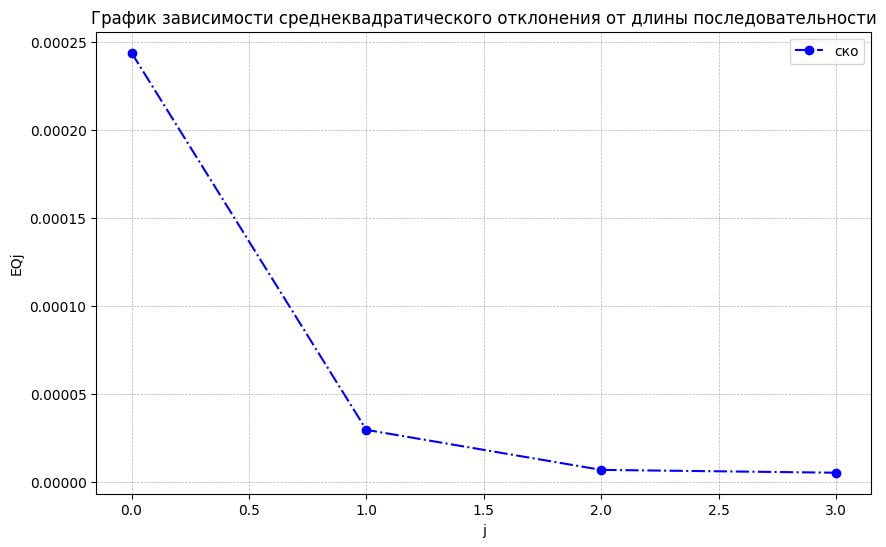

In [12]:
def draw_graph_std(len_series, std_values):

    plt.figure(figsize=(10, 6))
    plt.plot(len_series, std_values, marker='o', linestyle='dashdot', label="ско", color="blue")

    plt.xscale('linear')
    plt.yscale('linear')
    plt.xlabel('j')
    plt.ylabel('EQj')
    plt.title('График зависимости среднеквадратического отклонения от длины последовательности')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

len_Series = [0, 1, 2, 3]
std_values= [sum(std_hist(std, expectation, resY_e3,K)), sum(std_hist(std, expectation, resY_e4,K)), sum(std_hist(std, expectation, resY_e5,K)), sum(std_hist(std, expectation, resY_e6,K))]

draw_graph_std(len_Series, std_values)

In [13]:
a1 = []
a2 = []
a3 = []
a4 = []
a5 = []
a6 = []

n_v = [5, 10, 15, 30, 40, 50]

def random_close_to_mean(n, mean=10, std_dev=4, samples=12):
    numbers = []
    for _ in range(n):
        uniform_sum = sum(random.uniform(0, 1) for _ in range(samples))

        normalized = (uniform_sum - samples / 2) / (samples / 12)**0.5
        
        value = normalized * std_dev + mean
        numbers.append(value)
    return numbers


for idx, count in enumerate(n_v):
    numbers = random_close_to_mean(count)
    eval(f'a{idx + 1}').extend(numbers)

print("a1:", a1)
print("a2:", a2)
print("a3:", a3)
print("a4:", a4)
print("a5:", a5)
print("a6:", a6)


a1: [11.43793106528809, 9.862819853713884, 9.448254133783085, 6.192682087220639, 3.9524090492949284]
a2: [14.838717608742034, 12.047039771543584, 11.915758611057601, 5.956504775367545, 9.936962917669366, 7.270264666760767, 16.839631496056462, 6.188126085058112, 1.1144211890986924, 13.542216543332234]
a3: [9.795053676024217, 17.038700293691196, 5.480388190944119, 14.40308449997179, 12.103462881434833, 4.159426677056562, 8.545887417441683, 7.43031863825248, -0.09590921141142417, 4.79080378589147, 12.259554957160628, 7.502816194637436, 10.612729386033681, 9.667015879955155, 10.049425494343549]
a4: [15.346578479991841, 13.232681231474832, 8.439735908325012, 7.80856580617926, 7.562055619948165, 3.8149402694042074, 7.79022579985606, 9.380374832007021, 10.537671559485272, 8.393768371017284, 12.691822597935662, 11.38880145283143, 12.040875568014272, 14.513746647124318, 12.665922171739798, 12.352417056107356, 11.476045082388442, 14.10536931127482, 10.479450448746938, 17.73944625892938, 14.53974

In [14]:
# Функция для расчета среднего значения выборки
def mean_sample(data):
    return sum(data) / len(data)

# Функция для расчета среднего значения квадратов выборки
def mean_of_squares_sample(data):
    return sum(x**2 for x in data) / len(data)

# Функция для расчета дисперсии выборки
def unbiased_sample_variance(data, mean_sample, mean_of_squares_sample):
    N = len(data)
    if N < 2:
        return None
    return (N / (N - 1)) * (mean_of_squares_sample - mean_sample**2)

# Функция для расчета стандартного отклонения
def standard_deviation(variance_value):
    if variance_value is None or variance_value == 0:
        return None
    return math.sqrt(variance_value)

In [15]:
# Функция для расчета среднего значения, дисперсии и стандартного отклонения
def calculate_statistics(sequence):
    mean = mean_sample(sequence)
    mean_square = mean_of_squares_sample(sequence)
    variance = unbiased_sample_variance(sequence, mean, mean_square) 
    std_dev = standard_deviation(variance)
    return mean, variance, std_dev



In [16]:
import matplotlib.pyplot as plt

def draw_graph_mat_exp(n_values, mat_values, lower_bounds, upper_bounds, individual_means, p):
    # Рисование результатов
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, mat_values, marker='o', linestyle='dashdot', label="M_s (Среднее математическое ожидание)", color="blue")
    plt.plot(n_values, lower_bounds, marker='o', linestyle='--',  label="M_min_i (Нижняя граница)", color="red")
    plt.plot(n_values, upper_bounds, marker='o', linestyle='--', label="M_max_i (Верхняя граница)", color="green")
    plt.plot(n_values, individual_means, marker='o', label="Mi (Расчетное мат ожидание)", color="purple")

    plt.xscale('linear')
    plt.yscale('linear')
    plt.xlabel('Ni (Размер выборки)')
    plt.ylabel('Мат ожидание')
    plt.title(f'Доверительные интервалы для мат ожидания для p = {p}')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


def draw_graph_std(n_values, individual_std, std_values, std_min_intervals, std_max_intervals, p):
    # Рисование результатов
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, individual_std, marker='o', label='S_i (Расчетное ср. квад отклонение)')
    plt.plot(n_values, std_values, marker='o', linestyle='dashdot', label="Sc (Среднее квадратичное отклонение)", color="blue")
    plt.plot(n_values, std_min_intervals, marker='x', linestyle='--', label='S_min_i (Нижняя граница)')
    plt.plot(n_values, std_max_intervals, marker='x', linestyle='--', label='S_max_i (Верхняя граница)')
    plt.xscale('linear')
    plt.yscale('linear')

    plt.xlabel('Ni (Размер выборки)')
    plt.ylabel('Ср. квад отклонение')
    plt.title(f'Доверительные интервалы для ср.квад отклонения для p = {p}')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()

_______ГДЕ p=0.05_________

Статистика для a1 где n=5:
  Мат Ожидание = 8.179
  Дисперсия = 9.219
  Средне квадратичное отклонения = 3.036

Квантиль нормального распределения для a1 (seq=[11.43793106528809, 9.862819853713884, 9.448254133783085, 6.192682087220639, 3.9524090492949284]) (p=0.05): 1.960 

a_min = 5.517435795205998
a_max = 10.840202680514253 

Квантиль распределения Стьюдента для a1 (seq=[11.43793106528809, 9.862819853713884, 9.448254133783085, 6.192682087220639, 3.9524090492949284]): 2.776

a_min_t = 4.408757598617534
a_max_t = 11.948880877102717

Последовательность a1 с n = 5
  Верхняя квантиль хи-квадрата (1 - p/2, n-1): 11.143
  Нижняя квантиль хи-квадрата (p/2, n-1): 0.484

Доверительный интервал для дисперсии и ср. квад отклонения для последовательности a1:
 s_min_2: 3.309, s_max_2: 76.125
 s_a_min: 1.819, s_a_max: 8.725

______________________________________________________________________________________________________________________________________________

Стат

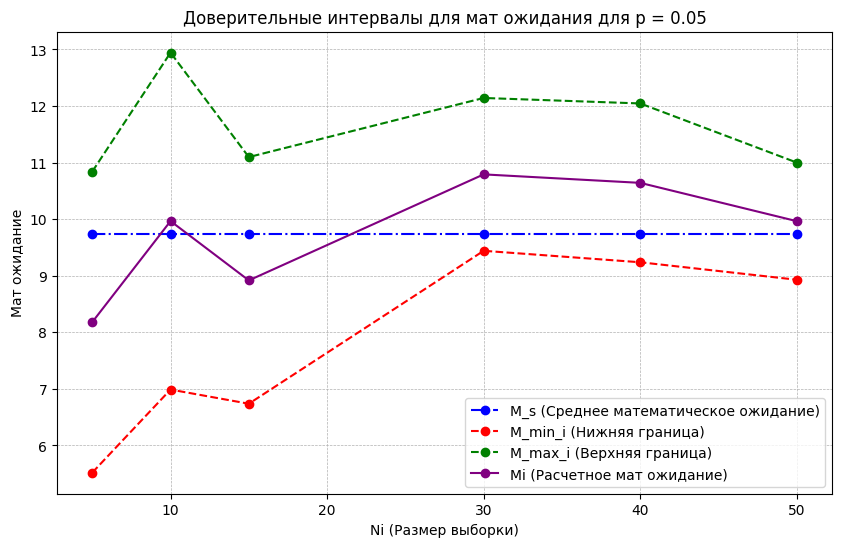

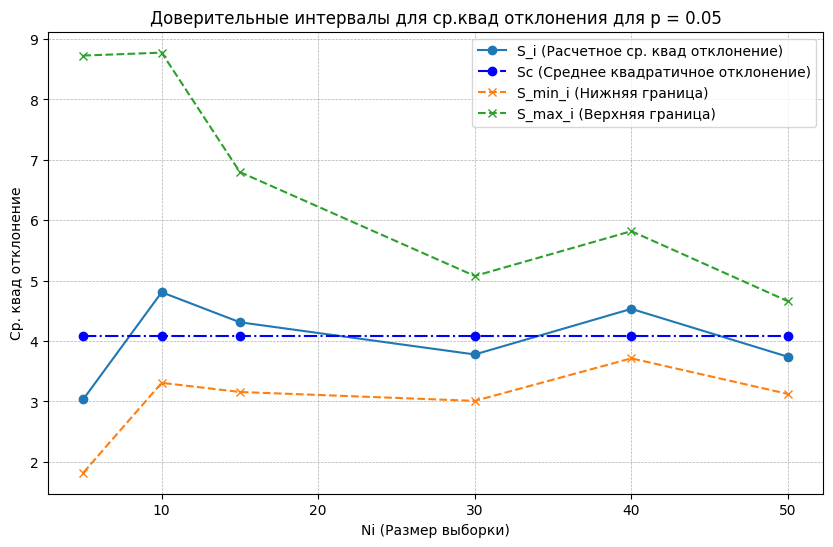

In [17]:
from scipy.stats import norm, t
import scipy.stats as stats

# Определить уровень значимости
p_values = [0.05]


for p in p_values:
    print(f"_______ГДЕ p={p}_________\n")
    
    # Вычисление статистики и доверительных интервалов для каждой последовательности
    lower_bounds = []
    upper_bounds = []
    individual_means = []

    std_min_intervals = []
    std_max_intervals = []
    individual_std = []

    for i, seq in enumerate([a1, a2, a3, a4, a5, a6], start=1):
        mean, variance, std_dev = calculate_statistics(seq)
        n = len(seq)

        individual_means.append(mean)
        individual_std.append(std_dev)
        
        print(f"Статистика для a{i} где n={n}:")
        print(f"  Мат Ожидание = {mean:.3f}")
        print(f"  Дисперсия = {variance:.3f}")
        print(f"  Средне квадратичное отклонения = {std_dev:.3f}")
        print()


        # Квантиль нормального распределения
        normal_quantile = norm.ppf(1 - p / 2)
        a_min = mean - normal_quantile * (std_dev / math.sqrt(n))
        a_max = mean + normal_quantile * (std_dev / math.sqrt(n))
        print(f"Квантиль нормального распределения для a{i} (seq={seq}) (p={p}): {normal_quantile:.3f} \n")
        print(f"a_min = {a_min}")
        print(f"a_max = {a_max} \n")

        # Хранение верхней и нижней квантилей
        lower_bounds.append(a_min)
        upper_bounds.append(a_max)

        # Квантиль распределения Стьюдента
        t_quantile = t.ppf(1 - p / 2, df=n - 1)
        a_min_t = mean - t_quantile * (std_dev / math.sqrt(n))
        a_max_t = mean + t_quantile * (std_dev / math.sqrt(n))
        print(f"Квантиль распределения Стьюдента для a{i} (seq={seq}): {t_quantile:.3f}\n")
        print(f"a_min_t = {a_min_t}")
        print(f"a_max_t = {a_max_t}\n")

        # Вычисление граничных квантилей для хи-квадрата
        chi2_upper = stats.chi2.ppf(1 - p / 2, df=n - 1)
        chi2_lower = stats.chi2.ppf(p / 2, df=n - 1)

        print(f"Последовательность a{i} с n = {n}")
        print(f"  Верхняя квантиль хи-квадрата (1 - p/2, n-1): {chi2_upper:.3f}")
        print(f"  Нижняя квантиль хи-квадрата (p/2, n-1): {chi2_lower:.3f}\n")

        
        # Вычисление доверительного интервала для дисперсии
        s_min_2 = ((std_dev**2) * (n - 1)) / chi2_upper
        s_max_2 = ((std_dev**2) * (n - 1)) / chi2_lower
        
        # Вычисление доверительного интервала для ср. квад отклонения
        s_a_min = math.sqrt(s_min_2)
        s_a_max = math.sqrt(s_max_2)
        
        std_min_intervals.append(s_a_min)
        std_max_intervals.append(s_a_max)


        print(f"Доверительный интервал для дисперсии и ср. квад отклонения для последовательности a{i}:")
        print(f" s_min_2: {s_min_2:.3f}, s_max_2: {s_max_2:.3f}")
        print(f" s_a_min: {s_a_min:.3f}, s_a_max: {s_a_max:.3f}\n")


        
        print(f"______________________________________________________________________________________________________________________________________________\n")
        
    mean_values = sum(individual_means) / len(individual_means)
    mat_values = [mean_values] * 6

    # Вычисление M_s (среднее по 6-ти выборкам ср.кв отклонение)
    std_avg = math.sqrt((4*(individual_std[0]**2) + 9*(individual_std[1]**2) + 14*(individual_std[2]**2) + 29*(individual_std[3]**2) + 39*(individual_std[4]**2) + 49*(individual_std[5]**2))/(5+10+15+30+40+50-6))
    std_values = [std_avg] * 6

    print(f"  Среднее математическое ожидание = {mean_values:.3f}")
    print(f"  Среднее  ср. квад отклонение = {std_avg:.3f}")


    n_values = [5, 10, 15, 30, 40, 50]

    draw_graph_mat_exp(n_values, mat_values, lower_bounds, upper_bounds, individual_means, p)
    draw_graph_std(n_values, individual_std, std_values, std_min_intervals, std_max_intervals, p)

    

   